In [1]:
import pandas as pd 
import requests
import unicodedata
from tqdm import tqdm
from bs4 import BeautifulSoup
import numpy as np
import seaborn as sns

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_7346/1906739471.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [7]:
wiki_data = pd.read_csv('../scrapers_organized/wiki_languages_most_recent.csv', index_col=False)
# wiki_data

In [6]:
unesco_data = pd.read_csv('../csv_files/extinct_languages_with_info.csv', index_col=False)
# unesco_data

In [9]:
wiki_data = wiki_data.drop(columns=['Unnamed: 0'])
wiki_data

,lang,family,dialects,iso3code,goglottocodettolog,speakers,regions,off_lang,rec_min_lang,url
0,Par%C3%A1_Ar%C3%A1ra_language,"['Niger–Congo', '?\n', 'Atlantic–Congo', 'Volt...",NaN,aaa,ghot1243,"(9,000 cited 1994)[1]",Edo State,NaN,NaN,https://en.wikipedia.org/wiki/Ghotuo_language
1,Par%C3%A1_Ar%C3%A1ra_language,"['Niger–Congo', '?\n', 'Atlantic–Congo', 'Benu...","['Alumu', 'Tesu']",aab,alum1246,"(7,000 cited 1999)[1]",Nassarawa State,NaN,NaN,https://en.wikipedia.org/wiki/Alumu_language
2,Par%C3%A1_Ar%C3%A1ra_language,"['Papuan Gulf', '\xa0?\n', 'Gogodala–Suki', 'G...",NaN,aac,arii1243,50 (2000)[1],"Ari and Serea villages, Aramia River area, Wes...",NaN,NaN,https://en.wikipedia.org/wiki/Ari_language_(Ne...
3,Par%C3%A1_Ar%C3%A1ra_language,"['Sepik', 'Upper Sepik', 'Amal–Kalou', 'Amal']",NaN,aad,amal1242,830 (2003)[1],Sandaun Province and East Sepik Province,NaN,NaN,https://en.wikipedia.org/wiki/Amal_language
4,Par%C3%A1_Ar%C3%A1ra_language,"['Indo-European', 'Albanian', 'Tosk', 'Arbëresh']","['Vaccarizzo Albanian', 'Palermitan Albanian\n...",aae,arbe1236,"70,000-100,000[1]","Abruzzo, Apulia, Basilicata, Calabria, Campani...",NaN,NaN,https://en.wikipedia.org/wiki/Arb%C3%ABresh_la...
...,...,...,...,...,...,...,...,...,...,...
6252,Par%C3%A1_Ar%C3%A1ra_language,"['Kra–Dai', 'Tai', 'Central Tai', 'Yang Zhuang']",NaN,zyg,yang1286,"770,000 in China (2004)[1]",Southwestern Guangxi,NaN,NaN,https://en.wikipedia.org/wiki/Yang_Zhuang_lang...
6253,Par%C3%A1_Ar%C3%A1ra_language,"['Kra–Dai', 'Tai', 'Northern Tai', ' (', 'Nort...",NaN,zyj,youj1238,"870,000 (2007)[1]",Guangxi,NaN,NaN,https://en.wikipedia.org/wiki/Youjiang_Zhuang
6254,Par%C3%A1_Ar%C3%A1ra_language,"['Kra–Dai', 'Tai', 'various Zhuang branches', ...",NaN,zyn,yong1275,1.8 million (2000)[1],China,NaN,NaN,https://en.wikipedia.org/wiki/Yongnan_languages
6255,Par%C3%A1_Ar%C3%A1ra_language,"['Sino-Tibetan', '\n(', 'Tibeto-Burman', ')', ...",NaN,zyp,zyph1238,"(20,000 cited 1994–2000)[1]","Myanmar, India",NaN,NaN,https://en.wikipedia.org/wiki/Zyphe_language


In [8]:
# row = wiki_data.iloc[2]
# region = row['regions'].lower()

# id_min = unesco_data['Country/Region'].apply(lambda x: wiki_data(x.lower(), region)).idxmin()

# unesco_data.iloc[id_min]

In [10]:
# Glottolog is very specific in naming dialects and other varieties, so iso codes will likely be more navigable

wiki_lang = wiki_data['lang'].to_list()
unesco_lang = unesco_data['lang'].to_list()
wiki_unesco_lang = pd.DataFrame({'Agg': list(set(wiki_lang) & set(unesco_lang))})


In [12]:
# wiki_data['name_normalized'] = wiki_data['lang'].str.lower()
# unesco_data['name_normalized'] = unesco_data['lang'].str.lower()

merged = pd.merge(wiki_data, unesco_data, left_on='lang', right_on='lang', how='outer')
merged['family'] = merged.apply(lambda row: row['family_x'] if pd.isnull(row['family_y']) else row['family_y'], axis=1)
merged['dialects'] = merged.apply(lambda row: row['dialects_x'] if pd.isnull(row['dialects_y']) else row['dialects_y'], axis=1)
merged['iso3code'] = merged.apply(lambda row: row['iso3code_x'] if pd.isnull(row['iso3code_y']) else row['iso3code_y'], axis=1)
merged['speakers'] = merged.apply(lambda row: row['speakers_x'] if pd.isnull(row['speakers_y']) else row['speakers_y'], axis=1)
merged['regions'] = merged.apply(lambda row: row['regions_x'] if pd.isnull(row['regions_y']) else row['regions_y'], axis=1)
merged['off_lang'] = merged.apply(lambda row: row['off_lang_x'] if pd.isnull(row['off_lang_y']) else row['off_lang_y'], axis=1)
merged['rec_min_lang'] = merged.apply(lambda row: row['rec_min_lang_x'] if pd.isnull(row['rec_min_lang_y']) else row['rec_min_lang_y'], axis=1)
merged.drop(columns=['family_x', 'family_y', 'dialects_x', 'dialects_y', 'iso3code_x', 'iso3code_y', 'speakers_x', 'speakers_y', 'regions_x', 'regions_y', 'off_lang_x', 'off_lang_y', 'rec_min_lang_x', 'rec_min_lang_y'], inplace=True)
merged
# what does how = 'outer' do in pd.merge()?




# merged_drop_na = merged.dropna(subset=['iso3codes'])
# merged_mass = pd.merge(merged, wiki_data, left_on = 'isocodes', right_on = 'iso3code', how = 'inner')

,lang,goglottocodettolog,url_x,Unnamed: 0,glottocode,url_y,family,dialects,iso3code,speakers,regions,off_lang,rec_min_lang
0,(Upper) Umpqua,NaN,NaN,252.0,uppe1436,https://en.wikipedia.org/wiki/Upper_Umpqua_lan...,"Dené–Yeniseian,Na-Dené, Athabaskan, Pacific Co...","Dené–Yeniseian,Na-Dené, Athabaskan, Pacific Co...",xup,Uknown,Oregon (Umpqua Valley),Unknown,Unknown
1,Abai Sungai,NaN,NaN,543.0,abai1240,https://en.wikipedia.org/wiki/Sungai_language,"Austronesian, Malayo-Polynesian, North Bornean...","Austronesian, Malayo-Polynesian, North Bornean...",abf,Uknown,Sabah,Unknown,Unknown
2,Abaza,NaN,NaN,1291.0,abaz1241,https://en.wikipedia.org/wiki/Abaza_language,"Northwest Caucasian, Abazgi, Abaza","Northwest Caucasian, Abazgi, Abaza",abq,"49,800",Karachay-Cherkessia,Russia Karachay-Cherkessia,Unknown
3,Abenaki#Eastern_Abenaki,NaN,NaN,220.0,NaN,https://en.wikipedia.org/wiki/Abenaki#Eastern_...,Uknown,Uknown,Not provided,Uknown,NaN,Unknown,Unknown
4,Abkhaz,NaN,NaN,512.0,abkh1244title Abkhaz,https://en.wikipedia.org/wiki/Abkhaz_language,"Northwest Caucasian, Abazgi, Abkhaz","Northwest Caucasian, Abazgi, Abkhaz",abktitle Abkhazian,"190,000",Georgia,Republic of Abkhaziaa,Georgia
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8079,kalaallisut,NaN,NaN,668.0,kala1399,https://en.wikipedia.org/wiki/West_Greenlandic,"Eskaleut, Eskimo, Inuit, Greenlandic, kalaallisut","Eskaleut, Eskimo, Inuit, Greenlandic, kalaallisut",kl,Uknown,NaN,Unknown,Unknown
8080,tunumiisut,NaN,NaN,994.0,tunu1234,https://en.wikipedia.org/wiki/Tunumiisut,"Eskaleut, Eskimo, Inuit, Greenlandic, tunumiisut","Eskaleut, Eskimo, Inuit, Greenlandic, tunumiisut",–,Uknown,NaN,Unknown,Unknown
8081,ǀXam,NaN,NaN,1636.0,xamm1241,https://en.wikipedia.org/wiki/Xam_language,"Tuu, ǃKwi, ǀXam","Tuu, ǃKwi, ǀXam",xam,Uknown,"South Africa, Lesotho",Unknown,Unknown
8082,ǁXegwi,NaN,NaN,601.0,xegw1238,https://en.wikipedia.org/wiki/%C7%81Xegwi_lang...,"Tuu, ǃKwi, Eastern, ǁXegwi","Tuu, ǃKwi, Eastern, ǁXegwi",xeg,Uknown,South Africa,Unknown,Unknown


In [13]:
merged.to_csv('general_language_info_merged.csv', index=False)

In [14]:
merged.isna().sum()/len(merged)

lang                  0.000000
goglottocodettolog    0.227363
url_x                 0.226002
Unnamed: 0            0.773998
glottocode            0.815190
url_y                 0.773998
family                0.001856
dialects              0.631989
iso3code              0.000742
speakers              0.089065
regions               0.271648
off_lang              0.724641
rec_min_lang          0.742825
dtype: float64

/var/folders/gl/l6pb7jfx42l02zc9950kh3fh0000gn/T/ipykernel_7346/939134945.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y=merged.columns, x=merged.isna().sum()/len(merged), palette='viridis')


<Axes: xlabel='Percentage of Missing Values', ylabel='Columns'>

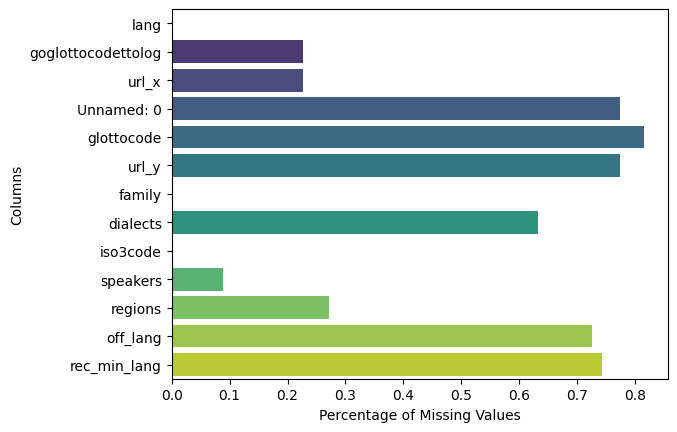

In [15]:
ax = sns.barplot(y=merged.columns, x=merged.isna().sum()/len(merged), palette='viridis')
ax.set_xlabel('Percentage of Missing Values')
ax.set_ylabel('Columns')
ax